### Baseline 2 Greedy Algorithm

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

##### Load data

In [2]:
distances_df = pd.read_csv('data/distanceslonglat.csv')

##### Greedy algorithm on all possible starting positions

In [3]:
def greedy_simulation(start, distances_df):
    total_distance = 0
    visited = set()
    order = []

    while len(visited) < len(distances_df):
        start_list = distances_df.loc[distances_df['Start'] == start]
        start_list = start_list.loc[start_list['Target'].isin(visited) == False]
        route_list = start_list.nsmallest(2, 'Distance')

        if len(route_list) > 1:
            route = route_list.iloc[1]
        elif len(route_list) == 1:
            route = route_list.iloc[0]

        if route['Target'] in visited:
            break
        else:
            total_distance += route['Distance']
            start = route['Target']
            visited.add(route['Start'])
            order.append(route['Start'])


    return total_distance, order

In [4]:
cities = distances_df['Start'].unique()

simulations = []
for city in tqdm(cities):
    total_distance, order = greedy_simulation(city, distances_df)
    simulations.append({
        'distance': total_distance,
        'order': order
    })

100%|██████████| 120/120 [01:05<00:00,  1.84it/s]


In [5]:
print(f'Baseline minimal distance: {min([i["distance"] for i in simulations])} km')

Baseline minimal distance: 117958.02466736174 km


##### Plot Result

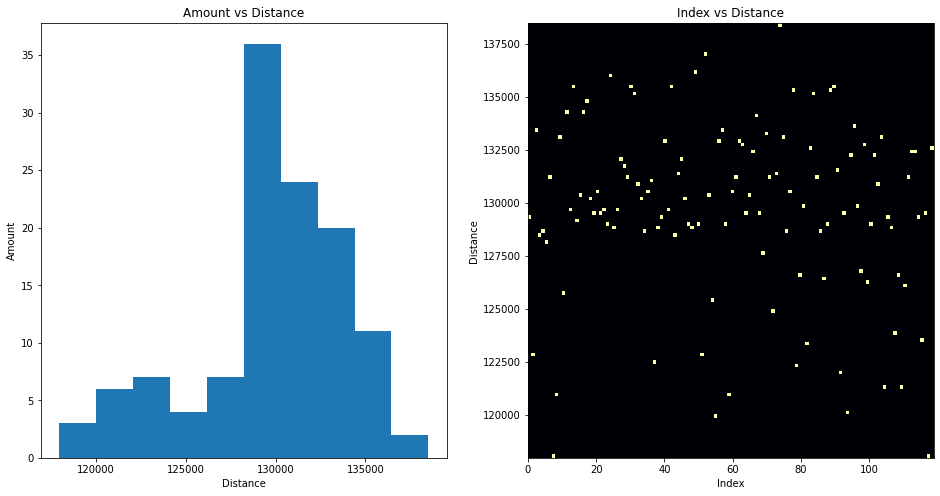

In [6]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.xlabel('Distance')
plt.ylabel('Amount')
plt.title("Amount vs Distance")

plt.hist([d['distance'] for d in simulations])

plt.subplot(1, 2, 2)

plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Index vs Distance")
plt.hist2d(range(len(simulations)), [d['distance'] for d in simulations], bins=(120, 120), cmap=plt.cm.inferno)
plt.show()